In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

import logging

In [2]:
logging.getLogger().setLevel(logging.CRITICAL)

from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)

In [4]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Cu_2p' : 5.321, 'Cl_2p' : 0.891})

In [5]:
def plot_xp_regions(experiments : list, regions : list, colors : list = None, ncols : int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))
    
    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols            
#             if i == len(regions) - 1:   # Set labels from last region
#                 li = plot_region(xp, r, ax=ax[j][k], lb=xp.name)
#                 if len(colors) > 0: li.set_color(colors[c])
#                 ax[j][k].set_title('Au_4d')
#                 ax[j][k].get_legend().remove()
#             else:
            li = plot_region(xp, r, ax=ax[j][k], lb=xp.name)
            if len(colors) > 0: li.set_color(colors[c])
            ax[j][k].set_title(r)            
            cosmetics_plot(ax=ax[j][k], leg = False);
#             ax[j][k].get_legend().remove()
            
        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
#     fig.legend()

# Analysis injections 1000 mbar
100, 200 & 400 pulses

At $t_{on}$ = 50 ms and C = 1µM

## Read processed experiments

In [5]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/**/*.xy'

files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('/proc' in f):
        files_new.append(f)
files = files_new[:-1]
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/18062020_Cu_clean.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/19062020_Cu_FBI_100pulses_1e-4M.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200628_Cu_FBI_100pulses_1e-4M_BaClO42_1e-4M.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200702_Cu_FBI_200pulses_1e-4M.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200706_Cu_FBI_200pulses_1e-4M_BaClO42_1e-4M_200pulses.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200716_Cu_FBI_400pulses_1e-4M.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200814_Cu_FBI_ester_200pulses_1e-4M.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200814_Cu_FBI_ester_200pulses_1e-4M_BaClO42_45min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200922_Cu_clean2.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/proc/20200923_Cu_FBI_subl_20min.xy']

In [6]:
proc_exps = []
colors = ['b', 'g', 'r', 'y', 'k', 'purple', 'c', 'm']
for f, c in zip(files, colors):
    proc_exps.append(read_processed_xp(f, color=c))

In [111]:
def plot_xp_regions(experiments : list, regions : list, colors : list = [], ncols: int = 3):
    """Subplots all regions of a list of experiments (unnormalised)"""
    rows = int(np.ceil(len(regions) / ncols))

    fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for c,xp in enumerate(experiments):
            j, k = i//ncols, i%ncols
            if i == len(regions) - 1:   # Set labels from last region
                li = plot_region(xp, r, ax=ax[j][k], lb=xp.name)
                if len(colors) > 0: li.set_color(colors[c])
                #ax[j][k].set_title('Au_4f')
                ax[j][k].get_legend().remove()
            else:
                li = plot_region(xp, r, ax=ax[j][k], lb='__nolabel__')
                if len(colors) > 0: li.set_color(colors[c])
                ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(experiments)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
    fig.legend()

## Show individual plots

In [6]:
proc_exps[0].dfx.columns

MultiIndex(levels=[['Ba_3d', 'C_1s', 'Cl_2p', 'Cu_2p', 'N_1s', 'O_1s', 'Overview_19.0', 'Overview_19.5', 'Overview_20.5', 'Overview_21.5'], ['counts', 'energy']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9], [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]],
           names=['range', 'properties'])

In [13]:
regions = proc_exps[0].dfx.columns.levels[0].values
regions= ['N_1s', 'C_1s', 'O_1s', 'Ba_3d', 'Cl_2p', 'Cu_2p']

In [118]:
plot_xp_regions(proc_exps[:3], regions, ncols=3)

In [116]:
colors = ['b','y', 'k', 'purple']
plot_xp_regions([proc_exps[0]]+proc_exps[3:5], regions, colors=[], ncols=3)

### Only FBI injections

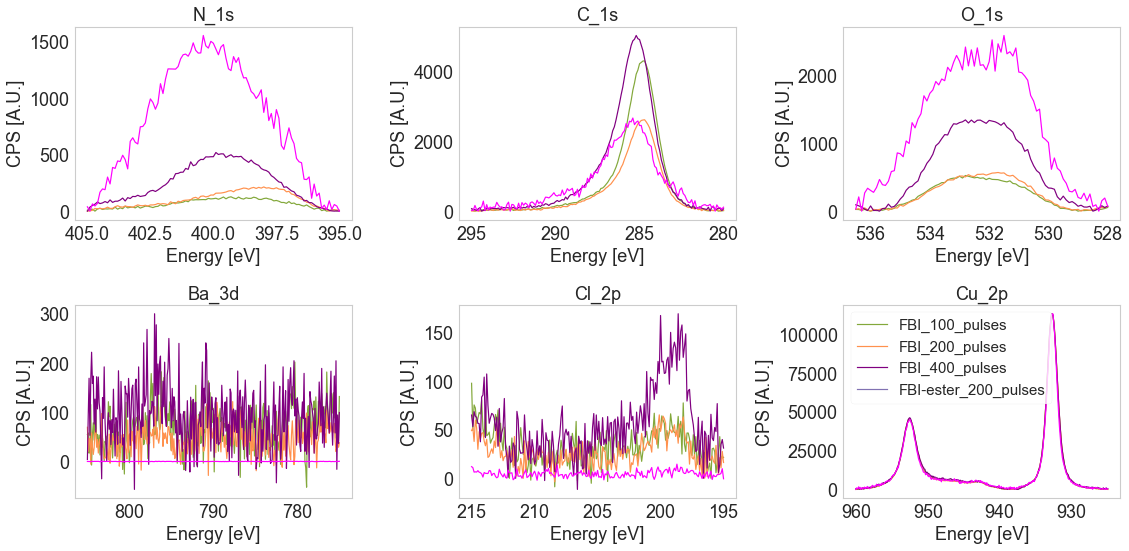

In [37]:
colors = ['g','y', 'purple', 'magenta']
plot_xp_regions([proc_exps[1]]+[proc_exps[3]] + [proc_exps[5]] + [proc_exps[6]], regions, colors, ncols=3)

### Only FBI-Ba

In [41]:
colors = ['r','k', 'c']
plot_xp_regions([proc_exps[2]]+[proc_exps[4]]+[proc_exps[7]] , regions, colors, ncols=3)

### Only N 1s region

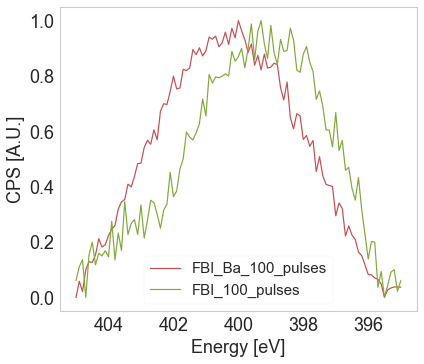

In [55]:
region = 'N_1s'
ax = plt.gca()

xp = normalise_dfx(proc_exps[2])
ax.plot(xp.dfx[region].energy, xp.dfx[region].counts, 'r', label=xp.name)

xp2 = normalise_dfx(proc_exps[1])
ax.plot(xp2.dfx[region].energy, xp2.dfx[region].counts, 'g', label=xp2.name)

cosmetics_plot()

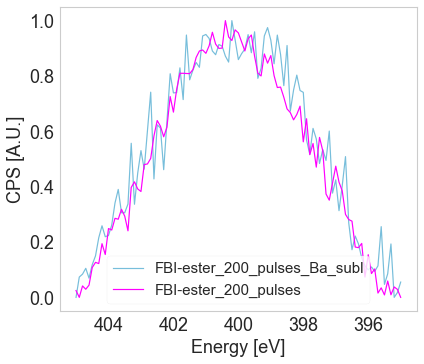

In [57]:
region = 'N_1s'
ax = plt.gca()

xp = normalise_dfx(proc_exps[7])
ax.plot(xp.dfx[region].energy, xp.dfx[region].counts, 'c', label=xp.name)

xp2 = normalise_dfx(proc_exps[6])
ax.plot(xp2.dfx[region].energy, xp2.dfx[region].counts, 'magenta', label=xp2.name)

cosmetics_plot()

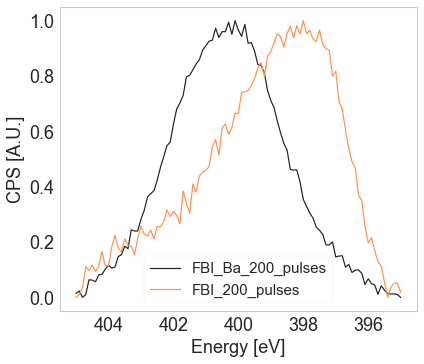

In [56]:
region = 'N_1s'
ax = plt.gca()

xp = normalise_dfx(proc_exps[4])
ax.plot(xp.dfx[region].energy, xp.dfx[region].counts, 'k', label=xp.name)

xp2 = normalise_dfx(proc_exps[3])
ax.plot(xp2.dfx[region].energy, xp2.dfx[region].counts, 'y', label=xp2.name)

cosmetics_plot()

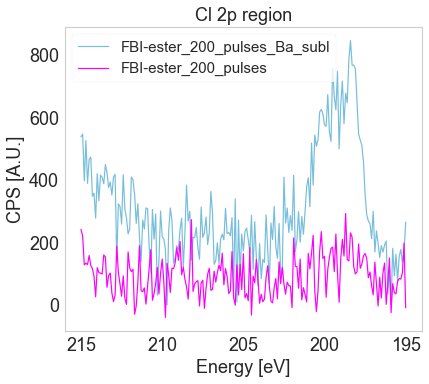

In [66]:
region = 'Cl_2p'
ax = plt.gca()

xp = normalise_dfx(proc_exps[7])
xp = proc_exps[7]

ax.plot(xp.dfx[region].energy, xp.dfx[region].counts, 'c', label=xp.name)

xp2 = normalise_dfx(proc_exps[6])
xp2 = proc_exps[6]

ax.plot(xp2.dfx[region].energy, xp2.dfx[region].counts*20, 'magenta', label=xp2.name)
ax.set(title='Cl 2p region')

cosmetics_plot()

### Subtracted clean Cu:

In [17]:
regions = ['N_1s', 'C_1s', 'O_1s', 'Cu_2p', 'Ba_3d', 'Cl_2p']

In [46]:
def plot_subtr_region(xp:XPS_experiment, xpRef: XPS_experiment, region: str, lb : str = None, ax = None):
    x = xp.dfx[region].energy.dropna().values
    y = xp.dfx[region].counts.dropna().values - xpRef.dfx[region].counts.dropna().values

    if lb == None: lb = xp.name + ' - '+ xpRef.name +', ' + region
    if ax == None: ax = plt.gca()
    p1 = ax.plot(x, y, label=lb)
    cosmetics_plot()
    return p1[0]


In [51]:
ncols = 3
rows = int(np.ceil(len(regions) / ncols))

fig, ax = plt.subplots(rows, ncols, figsize=(16, 8))
for i,r in enumerate(regions):
    j, k = i//ncols, i%ncols            
    li = plot_subtr_region(proc_exps[1], proc_exps[0], r, ax=ax[j][k], lb='__nolabel__')
    
    ax[j][k].set_title(r)
    cosmetics_plot(ax=ax[j][k], leg = False);
#     if len(proc_exps)%2 == 0:
#         ax[j][k].invert_xaxis()
plt.suptitle('Cu spectrum subtracted from FBI injection')

fig.legend()

### Only Ba 3d region

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(8, 32))
for i,xp in enumerate(proc_exps):
    plot_region(xp, 'Ba_3d', ax=ax[i]).set_color(colors[i])
    ax[i].set_title(xp.name)
    cosmetics_plot(ax=ax[i], leg=False)
ax[i].get_legend().remove()

IndexError: list index out of range

In [20]:
colors = ['b', 'g', 'y', 'r', 'k']
fig, ax = plt.subplots(1, 5, figsize=(40, 8))
for i,xp in enumerate(proc_exps):
#     if i == len(regions) - 1:   # Set labels from last region
    li = plot_region(xp, 'Ba_3d', ax=ax[i], lb='__nolabel__')
    if len(colors) > 0: li.set_color(colors[i])
    ax[i].set_title(xp.name)
    cosmetics_plot(ax=ax[i])
cosmetics_plot(ax=ax[i])

# plt.tight_layout()

### Normalized spectra

In [11]:
def plot_normal_regions(experiments : list, regions : list):
    """Subplots all normalized regions of a list of experiments"""
    rows = int(np.ceil(len(regions) / 3))
    cols = 3
    fig, ax = plt.subplots(rows, cols, figsize=(16, 8))
    for i,r in enumerate(regions):
        for xp in experiments:
            xp_norm = normalise_dfx(xp, inplace=False)
            j, k = i//3, i%3
            if i == len(experiments):   # Set labels from last region
                plot_region(xp_norm, r, ax=ax[j][k], lb=xp_norm.name)
                ax[j][k].set_title('Au_4f')
            else:
                plot_region(xp_norm, r, ax=ax[j][k], lb='__nolabel__')
                ax[j][k].set_title(r)
            cosmetics_plot(ax=ax[j][k], leg = False);
        if len(regions)%2 == 0:
            ax[j][k].invert_xaxis()
    plt.tight_layout()
    fig.legend()

In [15]:
plot_normal_regions(proc_exps[:2], regions)

In [ ]:
plot_normal_regions(proc_exps[:2], regions)

## Integrate areas 

In [7]:
for xp in proc_exps:
    xp.area = {}

### C 1s

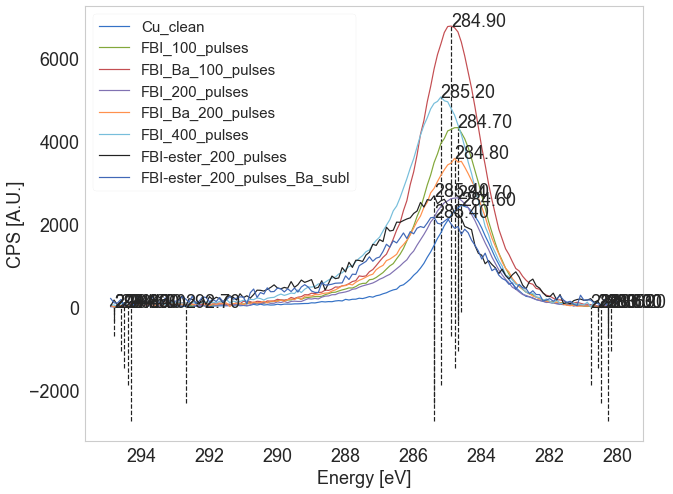

In [8]:
region = 'C_1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

In [16]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

### O 1s

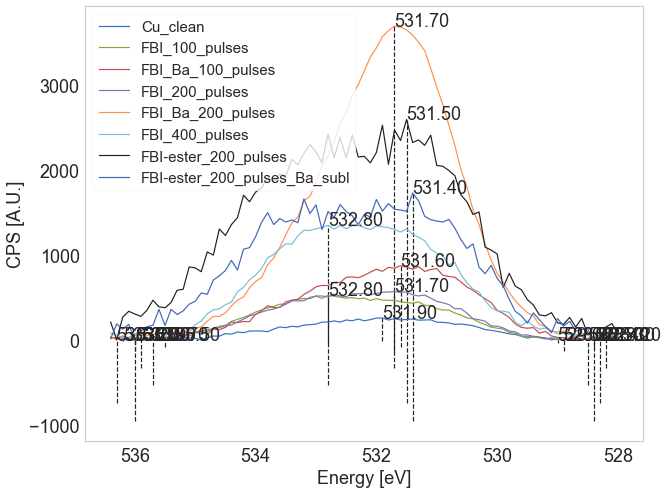

In [9]:
region = 'O_1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

KeyError: 0

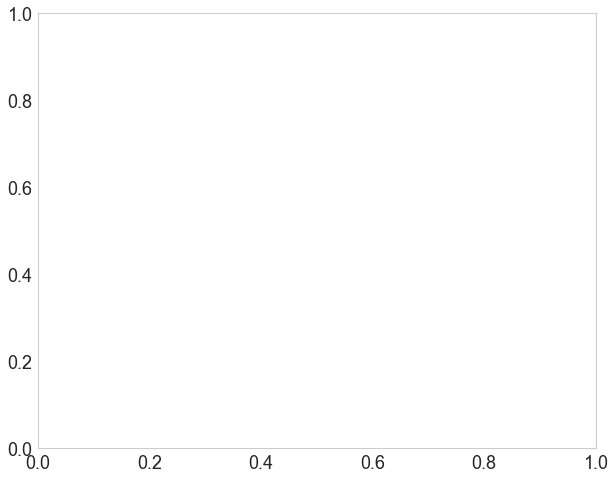

In [10]:
plt.figure(figsize=(10,8))

area_rel, names = [], []

for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

##### Substract reference O area (this worsens stoichiometry)

In [28]:
area0 = (proc_exps[0].area['O_1s'])

for xp in proc_exps[1:]:
    area = (xp.area['O_1s'])
    xp.area.update({'O_1s' : area - area0})
    

### Ba 3d

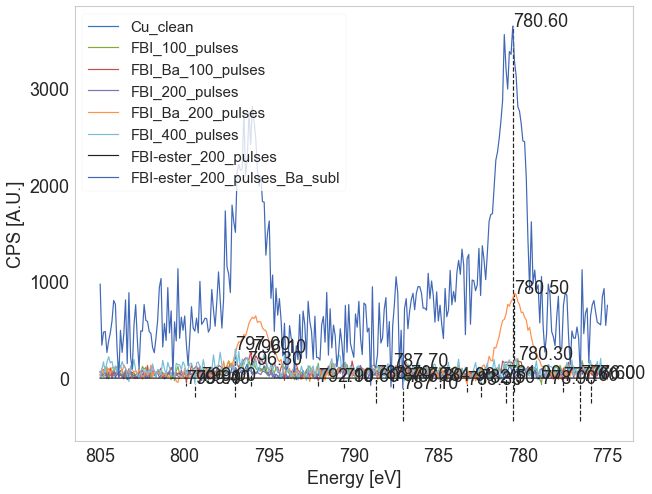

In [19]:
region = 'Ba_3d'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

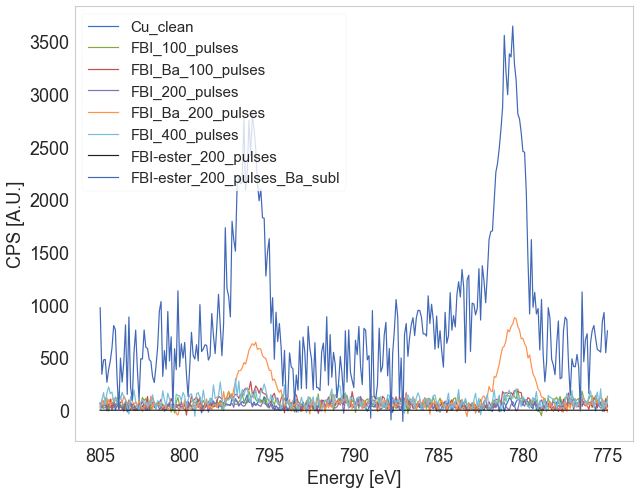

In [20]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

#### Subtract Ba from Au_clean

In [31]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    if j != 0: xp.dfx[region].counts -= proc_exps[0].dfx[region].counts
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### Cl 2p

In [23]:
region = 'Cl_2p'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    xp_crop = crop_spectrum(xp, region, eup=205, edw=None)
    ind.append(flexible_integration_limits(xp_crop, region, doublePeak=0))
cosmetics_plot()

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:61: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


In [ ]:
xp.area

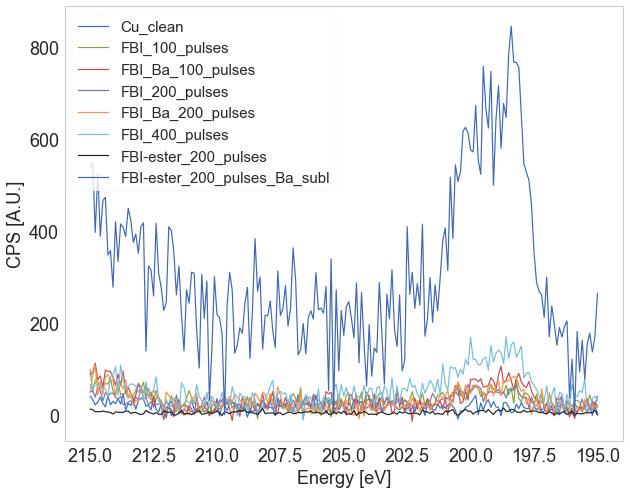

In [24]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

### N 1s

In [25]:
region = 'N_1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

In [26]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=5, rmidx=95)
    area_rel.append(area[0])
    xp.area.update({region : area[1]/asf[region]})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

In [37]:
xp.area

{'C_1s': 51608.0147383571,
 'O_1s': 5862.680969568455,
 'Ba_3d': 20.332328764561982,
 'N_1s': 5070.818669039367}

### Cu 2p

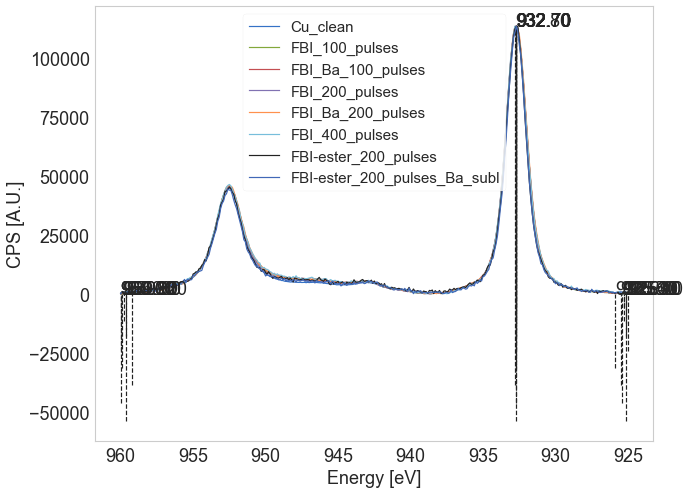

In [27]:
region = 'Cu_2p'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(proc_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

In [28]:
plt.figure(figsize=(10,8))

area_rel, names = [], []
area_in = []
for j,xp in enumerate(proc_exps):
    area = compare_areas(proc_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    xp.area.update({'Cu_2p' : area[1]/asf['Cu_2p']})
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

In [30]:
[xp.area['Cu_2p'] for xp in proc_exps]

[77331.29779857604,
 79620.80462272996,
 80926.20818352659,
 79168.99837642608,
 80896.72050565956,
 81825.48620914509,
 77929.9639196532,
 74933.42278487449]

## Stoichiometry 

In [31]:
num, denom = (('N_1s', 'C_1s', 'C_1s', 'Ba_3d', 'Cu_2p'), ('O_1s', 'N_1s', 'O_1s', 'N_1s', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	N_/O_	C_/N_	C_/O_	Ba_/N_	Cu_/N_	
Cu_clean	0.35	 45.98	 16.06	 0.10	 174.96	 
FBI_100_pulses	0.50	 28.77	 14.25	 0.06	 59.82	 
FBI_Ba_100_pulses	1.38	 10.19	 14.07	 0.01	 13.95	 
FBI_200_pulses	0.72	 12.36	 8.92	 0.02	 37.70	 
FBI_Ba_200_pulses	0.26	 9.64	 2.51	 0.07	 21.94	 
FBI_400_pulses	0.71	 10.18	 7.26	 0.02	 16.14	 
FBI-ester_200_pulses	1.13	 2.30	 2.61	 0.00	 4.68	 
FBI-ester_200_pulses_Ba_subl	0.92	 3.58	 3.29	 0.17	 8.38	 


In [79]:
1/59.82

0.01671681711802073

In [146]:
wCl = 31/13
noCl = 31/5
measure = 3.73
ratio_ba = (measure - wCl) / (noCl - wCl)

In [149]:
31/ 58
ratio_ba/0.53

0.6653225806451613

### (With subtracted  substrate O)

In [65]:
num, denom = (('C_1s', 'C_1s', 'C_1s', 'C_1s'), ('O_1s', 'Au_4f', 'Ba_3d', 'N_1s'))
make_stoichometry_table(proc_exps,  num=num, denom=denom)

Experiment	C_/O_	C_/Au_	C_/Ba_	C_/N_	
au_clean	2.05	 0.10	 158.84	 21.91	 
40pulses_200mbar	13.11	 0.28	 236.80	 67.58	 
120pulses_200mbar	11.05	 0.28	 235.77	 -186.52	 
80pulses_200mbar	10.68	 0.29	 754.16	 105.63	 


## Ba 3d

In [ ]:
region = 'Ba_3d'

In [320]:
plot_region(normalise_dfx(drp_exps[1]), region, lb=drp_exps[1].name).set_color('g')
plot_region(normalise_dfx(proc_exps[2]), region, lb=proc_exps[2].name).set_color('r')
plt.gca().legend()
plt.title('Ba 3d region normalized')
plt.gca().invert_xaxis()

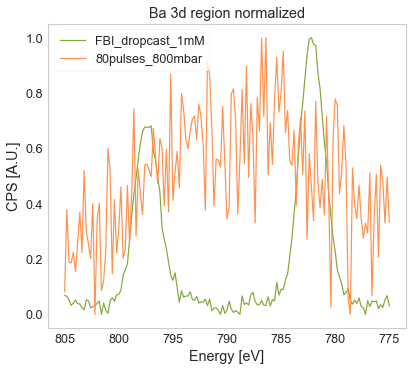

In [321]:
plot_region(normalise_dfx(drp_exps[1]), region, lb=drp_exps[1].name).set_color('g')
plot_region(normalise_dfx(proc_exps[3]), region, lb=proc_exps[3].name).set_color('y')
plt.gca().legend()
plt.title('Ba 3d region normalized')
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Ba 3d region normalized')

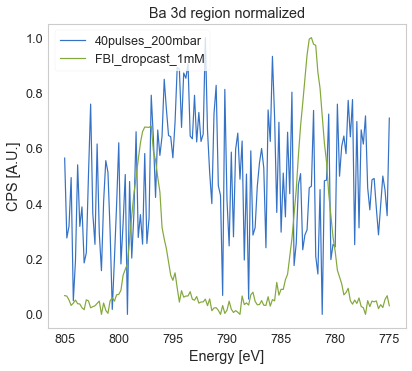

In [322]:
plot_region(normalise_dfx(exps_200mbar[1]), region, lb=exps_200mbar[1].name).set_color('b')
plot_region(normalise_dfx(drp_exps[1]), region, lb=drp_exps[1].name).set_color('g')

plt.gca().legend()
plt.gca().invert_xaxis()
plt.title('Ba 3d region normalized')

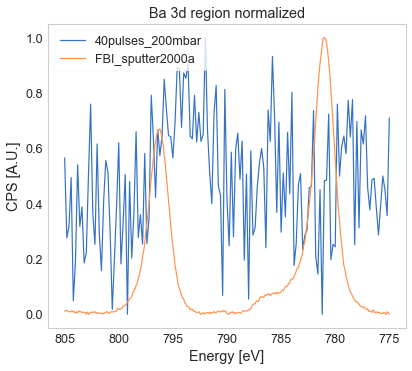

In [323]:
plot_region(normalise_dfx(exps_200mbar[1]), region, lb=exps_200mbar[1].name).set_color('b')
plot_region(normalise_dfx(drp_exps[3]), region, lb=drp_exps[3].name).set_color('y')

plt.gca().legend()
plt.title('Ba 3d region normalized')
plt.gca().invert_xaxis()

## N 1s

In [324]:
region = 'N_1s'

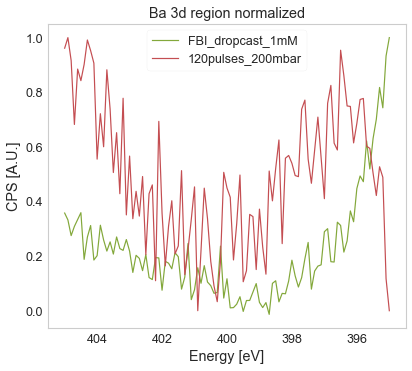

In [326]:
plot_region(normalise_dfx(drp_exps[1]), region, lb=drp_exps[1].name).set_color('g')
plot_region(normalise_dfx(exps_200mbar[3]), region, lb=exps_200mbar[3].name).set_color('r')
plt.gca().legend()
plt.title('Ba 3d region normalized')
plt.gca().invert_xaxis()

In [327]:
plot_region(normalise_dfx(drp_exps[2]), region, lb=drp_exps[2].name).set_color('y')
plot_region(normalise_dfx(exps_200mbar[3]), region, lb=exps_200mbar[3].name).set_color('r')
plt.gca().legend()
plt.title('Ba 3d region normalized')
plt.gca().invert_xaxis()